## Ładowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.spatial.distance import cdist
import statsmodels.api as sm

### Wczytywanie danych i mały Data Preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\dzmitry\Desktop\GSSvocab.csv")

In [3]:
df.drop(columns=['Unnamed: 0'],inplace= True)
df['treatment'] = df['educ'] > 12

### Braki danych 

In [4]:
df.isna().sum()

year             0
gender           0
nativeBorn      87
ageGroup        94
educGroup       81
vocab         1348
age             94
educ            81
treatment        0
dtype: int64

In [5]:
df = df.dropna(subset=['nativeBorn', 'ageGroup', 'educGroup','educ','age','vocab'])

###  Exploratory Data Analysis 

In [6]:
#podział zmienncyh
X = df[['age', 'gender', 'nativeBorn']]
X = pd.get_dummies(X, drop_first=True)
y = df['treatment']

In [7]:
col= ['gender', 'nativeBorn']
df= pd.get_dummies(df, columns=col, drop_first=True)
df

,year,ageGroup,educGroup,vocab,age,educ,treatment,gender_male,nativeBorn_yes
0,1978,50-59,12 yrs,10.0,52.0,12.0,False,False,True
1,1978,60+,<12 yrs,6.0,74.0,9.0,False,False,True
2,1978,30-39,<12 yrs,4.0,35.0,10.0,False,True,True
3,1978,50-59,12 yrs,9.0,50.0,12.0,False,False,True
4,1978,40-49,12 yrs,6.0,41.0,12.0,False,False,True
...,...,...,...,...,...,...,...,...,...
28862,2016,60+,13-15 yrs,6.0,68.0,13.0,True,False,True
28863,2016,50-59,>16 yrs,8.0,57.0,20.0,True,False,False
28864,2016,60+,13-15 yrs,7.0,77.0,15.0,True,True,True
28865,2016,60+,13-15 yrs,9.0,87.0,14.0,True,False,True


In [8]:
variables = ['gender_male', 'age', 'educ', 'vocab','nativeBorn_yes']

#Tworzenie tabeli ze statystykami
stats_table = pd.DataFrame({
    'Średnia': df[variables].mean(),
    'Mediana': df[variables].median(),
    'Odchylenie standardowe': df[variables].std(),
    'Wariancja': df[variables].var(),
    'Skośność': df[variables].skew(),
    'Kurtoza': df[variables].kurt()
})


In [9]:
stats_table

,Średnia,Mediana,Odchylenie standardowe,Wariancja,Skośność,Kurtoza
gender_male,0.433041,0.0,0.495505,0.245525,0.270286,-1.927087
age,45.745431,43.0,17.385507,302.255855,0.448925,-0.729639
educ,13.159101,13.0,3.006727,9.040405,-0.224862,0.869672
vocab,5.999781,6.0,2.104215,4.427720,-0.230006,-0.108063
nativeBorn_yes,0.914401,1.0,0.279777,0.078275,-2.962583,6.777393


In [10]:
age_group_distribution = df['ageGroup'].value_counts(normalize=True) * 100
educ_group_distribution = df['educGroup'].value_counts(normalize=True) * 100

In [11]:
age_group_distribution 

ageGroup
60+      23.746345
30-39    22.017544
18-29    20.800439
40-49    18.402778
50-59    15.032895
Name: proportion, dtype: float64

In [12]:
educ_group_distribution

educGroup
12 yrs       30.186404
13-15 yrs    25.372807
<12 yrs      19.239766
16 yrs       13.940058
>16 yrs      11.260965
Name: proportion, dtype: float64

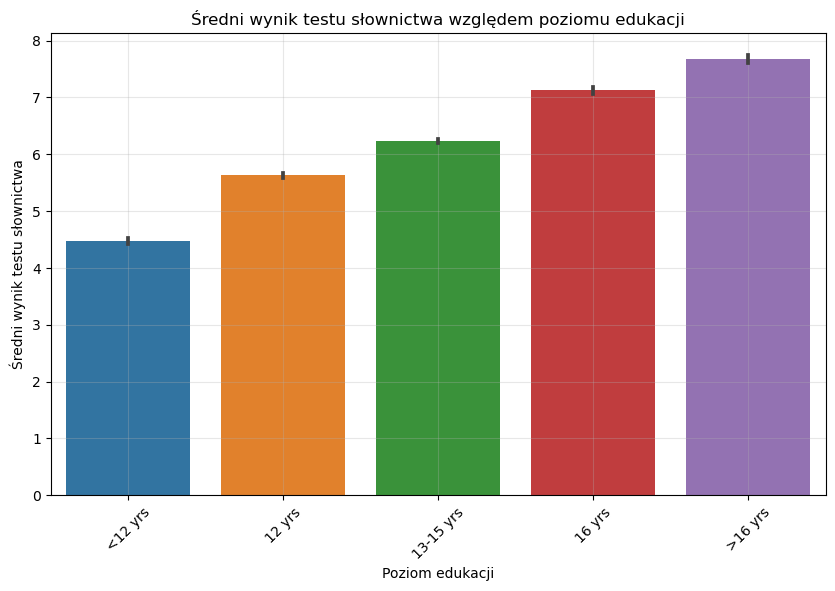

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='educGroup', y='vocab', estimator=lambda x: x.mean(), order=['<12 yrs', '12 yrs', '13-15 yrs', '16 yrs', '>16 yrs'])
plt.xlabel('Poziom edukacji')
plt.ylabel('Średni wynik testu słownictwa')
plt.title('Średni wynik testu słownictwa względem poziomu edukacji')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


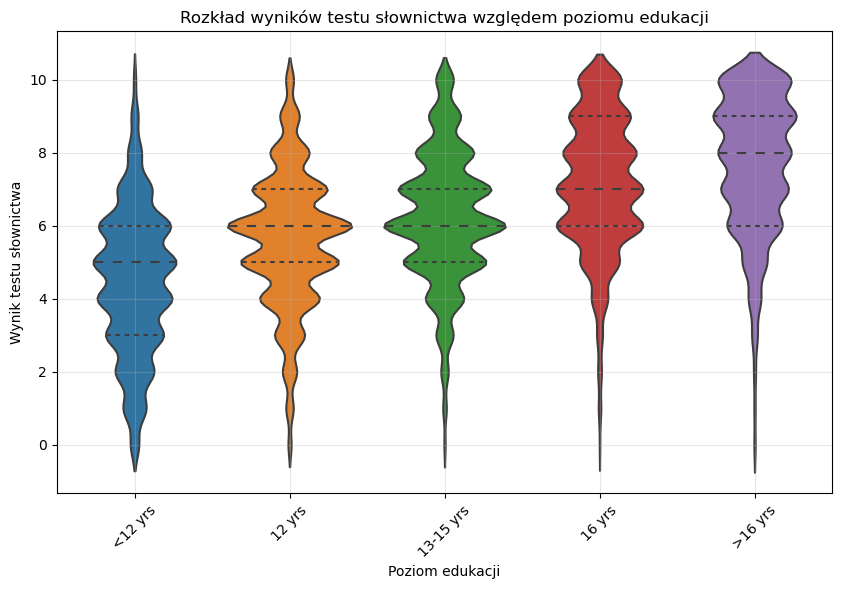

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='educGroup', y='vocab', inner='quartile', order=['<12 yrs', '12 yrs', '13-15 yrs', '16 yrs', '>16 yrs'])
plt.xlabel('Poziom edukacji')
plt.ylabel('Wynik testu słownictwa')
plt.title('Rozkład wyników testu słownictwa względem poziomu edukacji')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


### Budowa modelu

In [15]:
#Model logit
log_model = LogisticRegression()
log_model.fit(X, y)

#Predykcja propensity score
df['propensity_score'] = log_model.predict_proba(X)[:, 1]


In [16]:
X = X.astype(float)
y = y.astype(float) 

In [17]:
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const).fit()
print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.686389
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                27360
Model:                          Logit   Df Residuals:                    27356
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                0.009656
Time:                        19:36:41   Log-Likelihood:                -18780.
converged:                       True   LL-Null:                       -18963.
Covariance Type:            nonrobust   LLR p-value:                 4.633e-79
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6607      0.053     12.377      0.000       0.556       0.765
age              

In [18]:
aic_value = logit_model.aic
bic_value = logit_model.bic

print(f"AIC: {aic_value}")
print(f"BIC: {bic_value}")

AIC: 37567.21095925743
BIC: 37600.07830874437


Średni wynik w grupie traktowanej (wykształcenie > 12 lat): 6.799812097998121
Średni wynik w grupie kontrolnej (wykształcenie ≤ 12 lat): 5.41916600419166
Szacowany efekt przyczynowy (ATE): 1.3806460938064609


C:\Users\dzmitry\AppData\Local\Temp\ipykernel_37348\2262331572.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treatment'] == 1]['propensity_score'], shade=True, label='Traktowana', color='blue')
C:\Users\dzmitry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dzmitry\AppData\Local\Temp\ipykernel_37348\2262331572.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['treatment'] == 0]['propensity_score'], shade=True, label='Kontrolna', color='orange')
C:\Users\dzmitry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:11

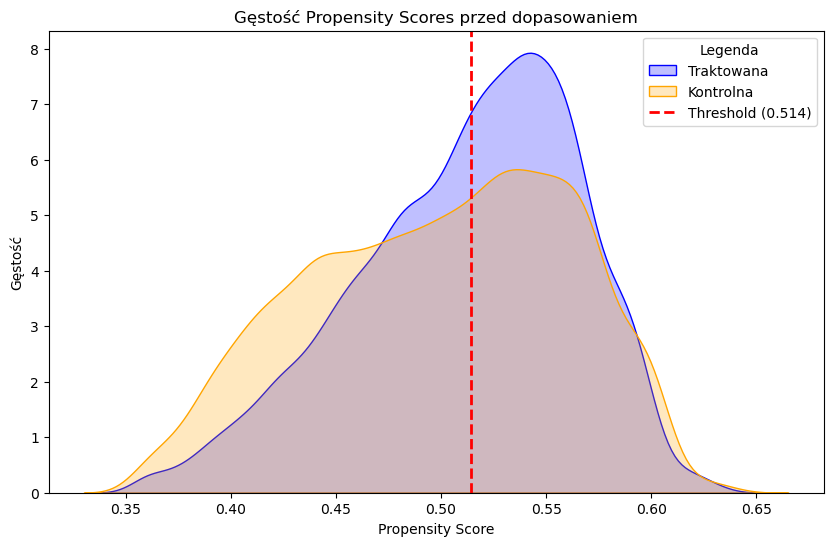

C:\Users\dzmitry\AppData\Local\Temp\ipykernel_37348\2262331572.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_matched[df_matched['treatment'] == 1]['propensity_score'], shade=True, label='Traktowana', color='blue')
C:\Users\dzmitry\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dzmitry\AppData\Local\Temp\ipykernel_37348\2262331572.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_matched[df_matched['treatment'] == 0]['propensity_score'], shade=True, label='Kontrolna', color='orange')
C:\Users\dzmitry\anaconda3\Lib\site

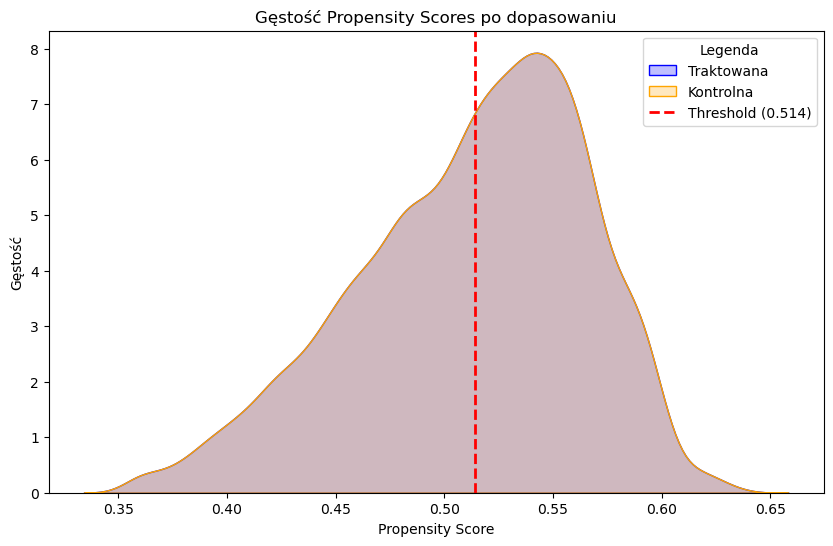

In [19]:
nn = NearestNeighbors(n_neighbors=1) 
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

nn.fit(control[['propensity_score']])

#Znajdź najbliższego sąsiada w grupie kontrolnej 
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control_indices = control.iloc[indices.flatten()].index

matched_treated = treated.reset_index(drop=True)
matched_control = control.loc[matched_control_indices].reset_index(drop=True)
df_matched = pd.concat([matched_treated, matched_control])

#Obliczenie ATE
treated_mean = df_matched[df_matched['treatment'] == 1]['vocab'].mean()
control_mean = df_matched[df_matched['treatment'] == 0]['vocab'].mean()
ATE = treated_mean - control_mean

#Wyświetlij wyniki
print(f"Średni wynik w grupie traktowanej (wykształcenie > 12 lat): {treated_mean}")
print(f"Średni wynik w grupie kontrolnej (wykształcenie ≤ 12 lat): {control_mean}")
print(f"Szacowany efekt przyczynowy (ATE): {ATE}")

#Treashold
threshold_percentile = 13738 / 27360
threshold_value = df['propensity_score'].quantile(threshold_percentile)

#Rysunki
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['treatment'] == 1]['propensity_score'], shade=True, label='Traktowana', color='blue')
sns.kdeplot(df[df['treatment'] == 0]['propensity_score'], shade=True, label='Kontrolna', color='orange')
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold_value:.3f})')
plt.xlabel("Propensity Score")
plt.ylabel("Gęstość")
plt.title("Gęstość Propensity Scores przed dopasowaniem")
plt.legend(title="Legenda")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df_matched[df_matched['treatment'] == 1]['propensity_score'], shade=True, label='Traktowana', color='blue')
sns.kdeplot(df_matched[df_matched['treatment'] == 0]['propensity_score'], shade=True, label='Kontrolna', color='orange')
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold_value:.3f})')
plt.xlabel("Propensity Score")
plt.ylabel("Gęstość")
plt.title("Gęstość Propensity Scores po dopasowaniu")
plt.legend(title="Legenda")
plt.show()

### Test T-studenta

In [20]:

variables = ['age', 'gender_male', 'nativeBorn_yes'] 

for var in variables:
    t_stat, p_value = ttest_ind(treated[var], control[var], equal_var=False) 
    print(f"{var}: t-studenta = {t_stat:.3f}, p-value = {p_value:.3f}")

    if p_value < 0.05:
        print(f" Różnica w {var} między grupami jest istotna.")
    else:
        print(f" Brak istotnych różnic w {var} między grupami.")


age: t-studenta = -18.165, p-value = 0.000
 Różnica w age między grupami jest istotna.
gender_male: t-studenta = 5.959, p-value = 0.000
 Różnica w gender_male między grupami jest istotna.
nativeBorn_yes: t-studenta = -3.702, p-value = 0.000
 Różnica w nativeBorn_yes między grupami jest istotna.


In [21]:
#Funkcja do obliczania
def standardized_mean_diff(var, df_treated, df_control):
    treated_mean = df_treated[var].mean()
    control_mean = df_control[var].mean()
    treated_std = df_treated[var].std()
    control_std = df_control[var].std()
    
    return abs(treated_mean - control_mean) / np.sqrt((treated_std**2 + control_std**2) / 2)

treated_before = df[df['treatment'] == 1] 
control_before = df[df['treatment'] == 0] 

smd_before = {var: standardized_mean_diff(var, treated_before, control_before) 
              for var in ['age', 'gender_male', 'nativeBorn_yes']}

treated_after = df_matched[df_matched['treatment'] == 1] 
control_after = df_matched[df_matched['treatment'] == 0]  

smd_after = {var: standardized_mean_diff(var, treated_after, control_after) 
             for var in ['age', 'gender_male', 'nativeBorn_yes']}

print("SRS przed dopasowaniem:", smd_before)
print("SRS po dopasowaniu:", smd_after)


SRS przed dopasowaniem: {'age': 0.21984322292693798, 'gender_male': 0.07205482776525454, 'nativeBorn_yes': 0.044743577107515115}
SRS po dopasowaniu: {'age': 0.00028646574751682715, 'gender_male': 0.0, 'nativeBorn_yes': 0.0015034179563314597}


In [22]:
#Podział na 5 kwantyli propensity score
df['ps_bin'] = pd.qcut(df['propensity_score'], q=5, labels=False)

ATT_strata = []
for q in df['ps_bin'].unique():
    strata = df[df['ps_bin'] == q]
    ATT_strata.append(strata[strata['treatment'] == 1]['vocab'].mean() - 
                      strata[strata['treatment'] == 0]['vocab'].mean())

ATE_stratification = np.mean(ATT_strata)
print(f"Propensity Score Stratification - Szacowany efekt przyczynowy (ATE): {ATE_stratification}")


Propensity Score Stratification - Szacowany efekt przyczynowy (ATE): 1.6537666324522948


In [23]:
#Wyznaczenie odległości Mahalanobisa 
cov_matrix = np.cov(X[['age', 'gender_male', 'nativeBorn_yes']].T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = cdist(treated[['age', 'gender_male', 'nativeBorn_yes']], 
                  control[['age', 'gender_male', 'nativeBorn_yes']], 
                  metric='mahalanobis', VI=inv_cov_matrix)

indices = distances.argmin(axis=1)
matched_control = control.iloc[indices].copy()
df_matched_mahalanobis = pd.concat([treated, matched_control])

ATE_mahalanobis = (df_matched_mahalanobis[df_matched_mahalanobis['treatment'] == 1]['vocab'].mean() - 
                   df_matched_mahalanobis[df_matched_mahalanobis['treatment'] == 0]['vocab'].mean())

print(f" Mahalanobis Matching - Szacowany efekt przyczynowy (ATE): {ATE_mahalanobis}")


 Mahalanobis Matching - Szacowany efekt przyczynowy (ATE): 1.2403700224036998


In [24]:
df['weight'] = np.where(df['treatment'] == 1, 
                        1 / df['propensity_score'], 
                        1 / (1 - df['propensity_score']))

# Obliczenie efektu przyczynowego
ATE_ipw = (df[df['treatment'] == 1]['vocab'] * df[df['treatment'] == 1]['weight']).mean() - \
          (df[df['treatment'] == 0]['vocab'] * df[df['treatment'] == 0]['weight']).mean()

print(f" Inverse Probability Weighting - Szacowany efekt przyczynowy (ATE): {ATE_ipw}")


 Inverse Probability Weighting - Szacowany efekt przyczynowy (ATE): 3.046525402694911


In [25]:

treated_after_mahalanobis = df_matched_mahalanobis[df_matched_mahalanobis['treatment'] == 1]  
control_after_mahalanobis = df_matched_mahalanobis[df_matched_mahalanobis['treatment'] == 0]  


smd_after_mahalanobis = {var: standardized_mean_diff(var, treated_after_mahalanobis, control_after_mahalanobis) 
                         for var in ['age', 'gender_male', 'nativeBorn_yes']}

print("SRS przed dopasowaniem (Mahalanobis Matching):", smd_before)
print("SRS po dopasowaniu (Mahalanobis Matching):", smd_after_mahalanobis)


SRS przed dopasowaniem (Mahalanobis Matching): {'age': 0.21984322292693798, 'gender_male': 0.07205482776525454, 'nativeBorn_yes': 0.044743577107515115}
SRS po dopasowaniu (Mahalanobis Matching): {'age': 0.0, 'gender_male': 0.0, 'nativeBorn_yes': 0.0}


In [26]:
df['weights'] = df['treatment'] / df['propensity_score'] + (1 - df['treatment']) / (1 - df['propensity_score'])

smd_after_ipw = {var: standardized_mean_diff(var, df[df['treatment'] == 1], df[df['treatment'] == 0]) 
                 for var in ['age', 'gender_male', 'nativeBorn_yes']}

print("SRS przed dopasowaniem (IPW):", smd_before)
print("SRS po dopasowaniu (IPW):", smd_after_ipw)


SRS przed dopasowaniem (IPW): {'age': 0.21984322292693798, 'gender_male': 0.07205482776525454, 'nativeBorn_yes': 0.044743577107515115}
SRS po dopasowaniu (IPW): {'age': 0.21984322292693798, 'gender_male': 0.07205482776525454, 'nativeBorn_yes': 0.044743577107515115}


In [27]:
df['ps_strata'] = pd.qcut(df['propensity_score'], q=5, labels=False)

smd_after_stratification = {}
for var in ['age', 'gender_male', 'nativeBorn_yes']:
    smd_strata = []
    for strata in df['ps_strata'].unique():
        treated_strata = df[(df['ps_strata'] == strata) & (df['treatment'] == 1)]
        control_strata = df[(df['ps_strata'] == strata) & (df['treatment'] == 0)]
        
        if not treated_strata.empty and not control_strata.empty:
            smd_strata.append(standardized_mean_diff(var, treated_strata, control_strata))
    
    smd_after_stratification[var] = np.mean(smd_strata)

print("SRS przed dopasowaniem (Propensity Score Stratification):", smd_before)
print("SRS po dopasowaniu (Propensity Score Stratification):", smd_after_stratification)


SRS przed dopasowaniem (Propensity Score Stratification): {'age': 0.21984322292693798, 'gender_male': 0.07205482776525454, 'nativeBorn_yes': 0.044743577107515115}
SRS po dopasowaniu (Propensity Score Stratification): {'age': 0.1344032234493803, 'gender_male': 0.07036421281823715, 'nativeBorn_yes': 0.04763637514421992}
